In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

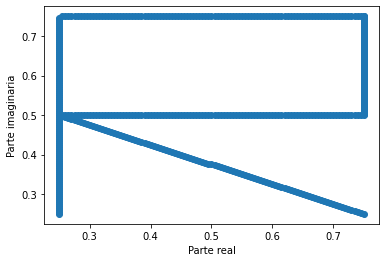

In [ ]:
lista_base = [] # aquí vamos a guardar la R
for n in range(100):
  t = (n/100)
  lista_base.append(t*1j)
  lista_base.append(t*(0.5j )+(1-t))
  lista_base.append(1j+(1-t))
  lista_base.append(0.5j+(1-t))
  lista_base.append((0.5j+1)*t+(1j+1)*(1-t))

lista = np.array(lista_base)
lista = (lista -(0.5 +0.5j))*0.5 + (0.5 +0.5j) # escalamos a la mitad nuestra R
lista_base = lista.tolist()

parte_real = lista.real
parte_imaginaria = lista.imag

plt.scatter(parte_real, parte_imaginaria)
plt.ylabel('Parte imaginaria')
plt.xlabel('Parte real')
plt.show()

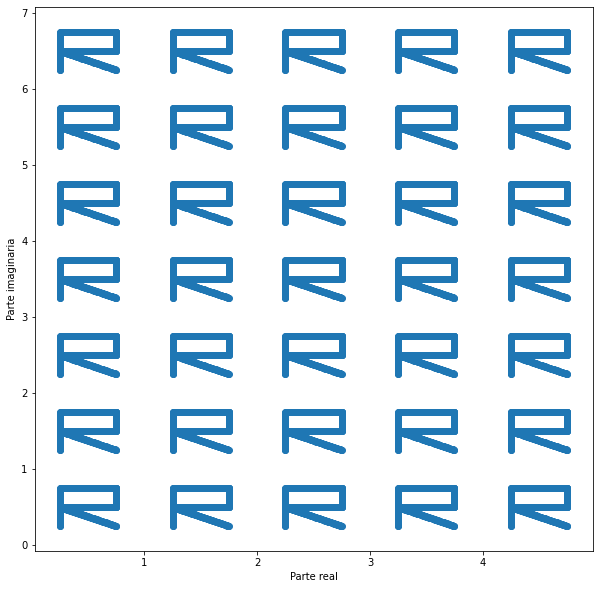

In [ ]:
lista_mosaico = []
n = 5
m = 7
for x in range(n):
  for y in range(m):
    for cosa in lista_base:
      lista_mosaico.append(cosa+(x+y*1j))

mosaico = np.array(lista_mosaico)
parte_real = mosaico.real
parte_imaginaria = mosaico.imag

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(parte_real, parte_imaginaria)
plt.ylabel('Parte imaginaria')
plt.xlabel('Parte real')
plt.show()

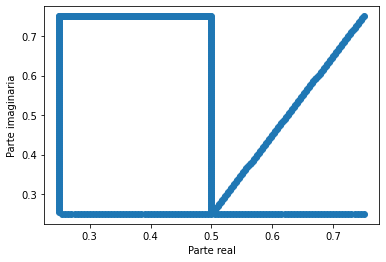

In [ ]:
def rotar_y_trasladar(rot, tras, conjunto):
  solucion = []
  tras += 0.5 +0.5j
  for cosa in conjunto:
    solucion.append((cosa-(0.5 +0.5j))*rot + tras)
  return solucion

cosa_rotada = rotar_y_trasladar(1j, 0, lista_base)

mosaico = np.array(cosa_rotada)
parte_real = mosaico.real
parte_imaginaria = mosaico.imag

plt.scatter(parte_real, parte_imaginaria)
plt.ylabel('Parte imaginaria')
plt.xlabel('Parte real')
plt.show()

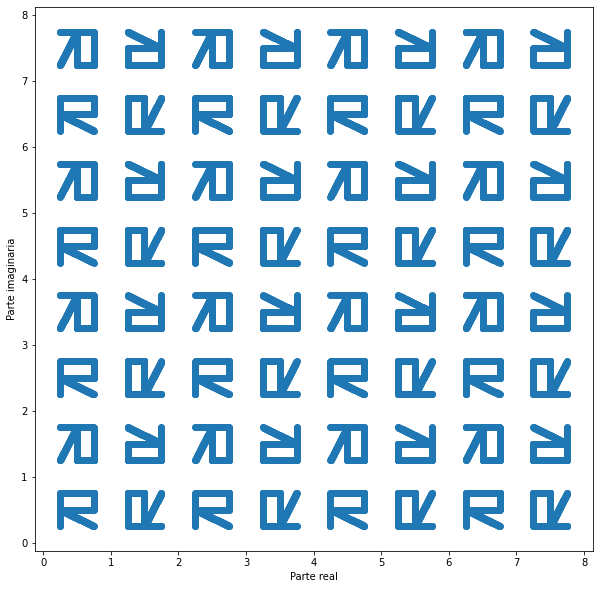

In [ ]:
lista_mosaico = []
n = 8
m = 8
for x in range(n):
  for y in range(m):
    if (x%2==1 and y%2==0):
      lista_mosaico += rotar_y_trasladar(1j, x+y*1j, lista_base)
    elif (x%2==1 and y%2==1):
      lista_mosaico += rotar_y_trasladar(-1, x+y*1j, lista_base)
    elif (x%2==0 and y%2==1):
      lista_mosaico += rotar_y_trasladar(-1j, x+y*1j, lista_base)
    else:
      lista_mosaico += rotar_y_trasladar(1, x+y*1j, lista_base)
mosaico = np.array(lista_mosaico)
parte_real = mosaico.real
parte_imaginaria = mosaico.imag

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(parte_real, parte_imaginaria)
plt.ylabel('Parte imaginaria')
plt.xlabel('Parte real')
plt.savefig('mosaico concurso')
plt.show()



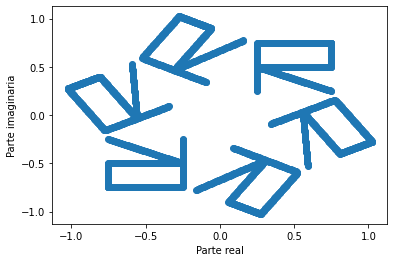

In [ ]:
def hacer_hexagono(conjunto):
  solucion = []
  r = np.array(conjunto)
  for i in range(6):
    r_rotada = r*(math.cos(i*math.pi/3)+math.sin(i*math.pi/3)*1j)
    solucion += r_rotada.tolist()
  return solucion

cosa_rotada = hacer_hexagono(lista_base)

mosaico = np.array(cosa_rotada)
parte_real = mosaico.real
parte_imaginaria = mosaico.imag

plt.scatter(parte_real, parte_imaginaria)
plt.ylabel('Parte imaginaria')
plt.xlabel('Parte real')
plt.show()

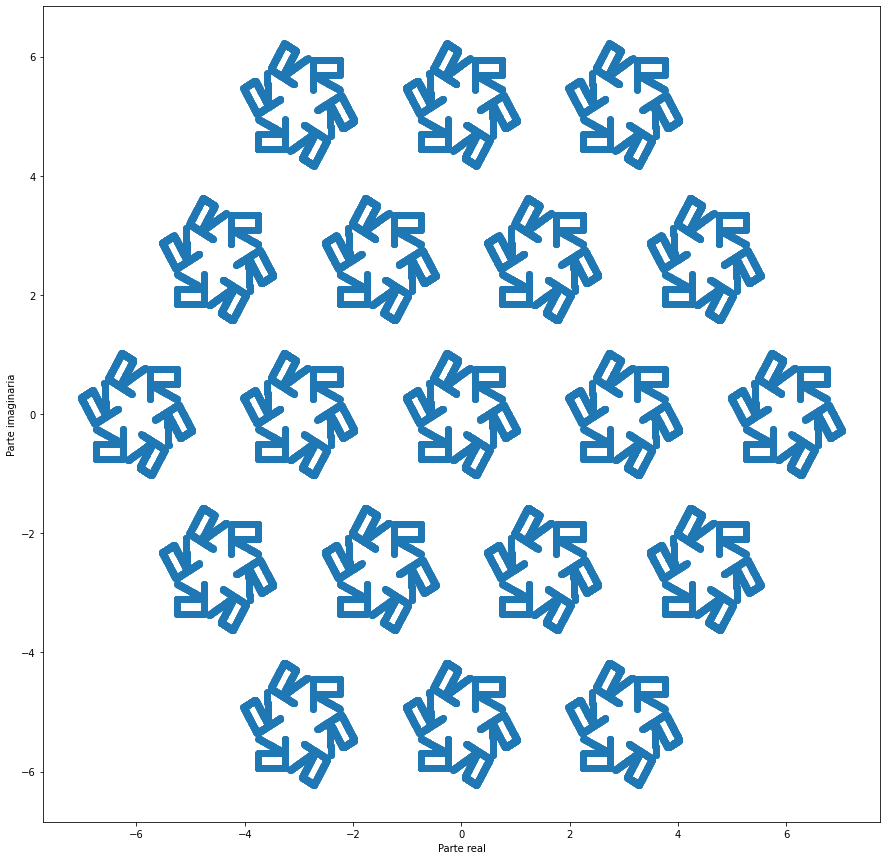

In [ ]:
lista_mosaico = []
n = 10
m = 10
hexagono_de_Rs = np.array(hacer_hexagono(lista_base))
for x in range(-n,n):
  for y in range(-m,m):
    vector_traslacion = (x + y*math.cos(math.pi/3) + math.sin(math.pi/3)*y*1j)*3
    if vector_traslacion.real**2 +vector_traslacion.imag**2<50:
      lista_mosaico +=  (hexagono_de_Rs+vector_traslacion).tolist()
mosaico = np.array(lista_mosaico)
parte_real = mosaico.real
parte_imaginaria = mosaico.imag

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.scatter(parte_real, parte_imaginaria)
plt.ylabel('Parte imaginaria')
plt.xlabel('Parte real')
plt.savefig('mosaico concurso')
plt.show()